# Chapter 2 

A text corpus is a large body of text. Many corpora are designed to contain a careful balance of material in one or more genres. We examined some small text collections in 1., such as the speeches known as the US Presidential Inaugural Addresses. This particular corpus actually contains dozens of individual texts — one per address — but for convenience we glued them end-to-end and treated them as a single text. 1. also used various pre-defined texts that we accessed by typing from nltk.book import *.

## Gutenberg Corpus

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/. We begin by getting the Python interpreter to load the NLTK package, then ask to see nltk.corpus.gutenberg.fileids(), the file identifiers in this corpus:

In [13]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let's pick out the first of these texts — Emma by Jane Austen — and give it a short name, emma, then find out how many words it contains:

In [14]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

Now let's try the command *concordance()* on the word "surprize" from *emma*:

In [15]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

When we defined emma, we invoked the words() function of the gutenberg object in NLTK's corpus package. But since it is cumbersome to type such long names all the time, Python provides another version of the import statement, as follows:

In [17]:
from nltk.corpus import gutenberg
emma = gutenberg.words('austen-emma.txt')

Let's write a short program to display other information about each text, by looping over all the values of fileid corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. For a compact output display, we will round each number to the nearest integer, using round().

In [19]:
for fileid in gutenberg.fileids():
     num_chars = len(gutenberg.raw(fileid))
     num_words = len(gutenberg.words(fileid))
     num_sents = len(gutenberg.sents(fileid))
     num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
     print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


The previous example also showed how we can access the "raw" text of the book [1], not split up into tokens. The raw() function gives us the contents of the file without any linguistic processing. So, for example, len(gutenberg.raw('blake-poems.txt')) tells us how many letters occur in the text, including the spaces between words. The sents() function divides the text up into its sentences, where each sentence is a list of words:

In [20]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [21]:
macbeth_sentences[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [22]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## Unicode and Encoding

Unicode supports over a million characters. Each character is assigned a number, called a code point. 
In Python, code points are written in the form \uXXXX,
where XXXX is the number in four-digit hexadecimal form.

translation into Unicode is called decoding. Conversely, to write out Unicode to a file or a terminal, we first need to translate it into a suitable encoding— this translation out of Unicode is called encoding.

In [ ]:
# To access a certain file and read it 
import codecs
path = ‘C:\Computational_Linguistics\ex1_ar.txt'
lines = codecs.open(path, ‘r’,'utf-8') .readlines()

# note: Add the path of your Arabic text file instead of C:\Computational_Linguistics\ex1_ar.txt

##  Functions

Suppose that you work on analyzing text that involves different forms of the same word, and that part of your program needs to work out the plural form of a given singular noun. Suppose it needs to do this work in two places, once when it is processing some texts, and again when it is processing user input.

Rather than repeating the same code several times over, it is more efficient and reliable to localize this work inside a function. A function is just a named block of code that performs some well-defined task.

In [1]:
# Some examples of functions.
def lexical_diversity(text):
     return len(text) / len(set(text))

In [2]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

16.050197203298673

In [40]:
# Now we make a function which gives us the plural form of any word.
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [41]:
plural("man")

'men'

In [11]:
plural("book")

'books'

## Modules

Over time you will find that you create a variety of useful little text processing functions, and you end up copying them from old programs to new ones. Which file contains the latest version of the function you want to use? It makes life a lot easier if you can collect your work into a single place, and access previously defined functions without making copies.

To do this, save your function(s) in a file called (say) text_proc.py. Now, you can access your work simply by importing it from the file:

In [12]:
from text_proc import plural
plural("wish")

'wishes'

## Lexical Resources

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts. For example, if we have defined a text my_text, then vocab = sorted(set(my_text)) builds the vocabulary of my_text, while word_freq = FreqDist(my_text) counts the frequency of each word in the text. Both of vocab and word_freq are simple lexical resources.

# Regular Expressions
Many linguistic processing tasks involve pattern matching. For example, we can find words ending with ed using endswith('ed'). 
We saw a variety of such "word tests" in 4.2 (in Chapter 1). Regular expressions give us a more powerful and flexible method for 
describing the character patterns we are interested in.

### Note

There are many other published introductions to regular expressions, organized around the syntax of regular expressions and 
applied to searching text files. Instead of doing this again, we focus on the use of regular expressions at different stages of 
linguistic processing. As usual, we'll adopt a problem-based approach and present new features only as they are needed to solve 
practical problems. In our discussion we will mark regular expressions using chevrons like this: «patt».
To use regular expressions in Python we need to import the re library using: import re. We also need a list of words to search; 
we'll use the Words Corpus again (4). We will preprocess it to remove any proper names.

Import Python's regular expression library
import re

nltk.corpus.words.words('en') is a list of all English words in its corpus
We find all lower case words (so that we don't repeat with capitalized words) and place them in wordlist:


wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()] 

In [3]:
# Using Basic Meta-Characters

# Let's find words ending with ed using the regular expression «ed$». We will use the re.search(p, s) function to check whether 
# the pattern p can be found somewhere inside the string s. We need to specify the characters of interest, and use the dollar sign 
# which has a special behavior in the context of regular expressions in that it matches the end of the word:
import nltk
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
[w for w in wordlist if re.search('ed$', w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [4]:
# The . wildcard symbol matches any single character. Suppose we have room in a crossword puzzle for an 8-letter word with j as 
# its third letter and t as its sixth letter. In place of each blank cell we use a period:

[w for w in wordlist if re.search('^..j..t..$', w)]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector',
 'unjilted',
 'unjolted',
 'unjustly']

In [5]:
# Note

# Your Turn: The caret symbol ^ matches the start of a string, just like the $ matches the end. What results do we get with the above 
# example if we leave out both of these, and search for «..j..t..»?
[w for w in wordlist if re.search('..j..t..', w)]

['abjectedness',
 'abjection',
 'abjective',
 'abjectly',
 'abjectness',
 'adjection',
 'adjectional',
 'adjectival',
 'adjectivally',
 'adjective',
 'adjectively',
 'adjectivism',
 'adjectivitis',
 'adjustable',
 'adjustably',
 'adjustage',
 'adjustation',
 'adjuster',
 'adjustive',
 'adjustment',
 'antejentacular',
 'antiprojectivity',
 'bijouterie',
 'coadjustment',
 'cojusticiar',
 'conjective',
 'conjecturable',
 'conjecturably',
 'conjectural',
 'conjecturalist',
 'conjecturality',
 'conjecturally',
 'conjecture',
 'conjecturer',
 'coprojector',
 'counterobjection',
 'dejected',
 'dejectedly',
 'dejectedness',
 'dejectile',
 'dejection',
 'dejectly',
 'dejectory',
 'dejecture',
 'disjection',
 'guanajuatite',
 'inadjustability',
 'inadjustable',
 'injectable',
 'injection',
 'injector',
 'injustice',
 'insubjection',
 'interjection',
 'interjectional',
 'interjectionalize',
 'interjectionally',
 'interjectionary',
 'interjectionize',
 'interjectiveness',
 'interjector',
 'interje

In [6]:
# Finally, the ? symbol specifies that the previous character is optional. Thus «^e-?mail$» will match both email and e-mail. We 
# could count the total number of occurrences of this word (in either spelling) in a text using 
# sum(1 for w in text if re.search('^e-?mail$', w)).

In [7]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]
# word can be the concatenation of [g|h|i] [m|n|o] [j|l|k] [d|e|f]

['gold', 'golf', 'hold', 'hole']

In [8]:
[w for w in wordlist if re.search('^[a-fj-o]+$', w)]
# - means a range. So match any letters between a and f or j and o a minumum of 1 instance
# alternatively, any word that does not have the letters g, h, i, p, q, r, s, t, u, v, w, x, y, z

['a',
 'aa',
 'aal',
 'aam',
 'aba',
 'abac',
 'abaca',
 'aback',
 'abaff',
 'abalone',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonee',
 'abb',
 'abdal',
 'abdomen',
 'abeam',
 'abed',
 'abele',
 'able',
 'abloom',
 'abode',
 'abolla',
 'aboma',
 'aboon',
 'academe',
 'acana',
 'acca',
 'accede',
 'accedence',
 'accend',
 'accolade',
 'accoladed',
 'accolle',
 'accommodable',
 'ace',
 'ackman',
 'acle',
 'acme',
 'acne',
 'acnodal',
 'acnode',
 'acock',
 'acold',
 'acoma',
 'acone',
 'ad',
 'adad',
 'adance',
 'add',
 'adda',
 'addable',
 'added',
 'addend',
 'addenda',
 'addle',
 'ade',
 'adead',
 'adeem',
 'adenocele',
 'adenoma',
 'adman',
 'ado',
 'adobe',
 'ae',
 'aefald',
 'aenean',
 'aeon',
 'aface',
 'affa',
 'affable',
 'aflame',
 'afoam',
 'ajaja',
 'ak',
 'aka',
 'akala',
 'ake',
 'akeake',
 'akee',
 'aknee',
 'ako',
 'al',
 'ala',
 'alack',
 'alada',
 'alala',
 'alameda',
 'alamo',
 'alan',
 'aland',
 'alb',
 'alba',
 'alban',
 'albe',
 'albedo',
 'albee',
 'alcalde

In [9]:
# Let's explore the + symbol a bit further. Notice that it can be applied to individual letters, or to bracketed sets of letters:

chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$', w)]
# I predict this means [one or more m, one or more i, one or more n, one or more e]
# this makes sense when you look at chat data

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [10]:
[w for w in chat_words if re.search('^[ha]+$', w)]
# I predict this is one or more of h or a. This could be words like haha, haaahaaa, etc.

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh',
 'ahhhhhh',
 'ahhhhhhhhhhhhhh',
 'h',
 'ha',
 'haaa',
 'hah',
 'haha',
 'hahaaa',
 'hahah',
 'hahaha',
 'hahahaa',
 'hahahah',
 'hahahaha',
 'hahahahaaa',
 'hahahahahaha',
 'hahahahahahaha',
 'hahahahahahahahahahahahahahahaha',
 'hahahhahah',
 'hahhahahaha']

In [11]:
# It should be clear that + simply means "one or more instances of the preceding item", which could be an individual character 
# like m, a set like [fed] or a range like [d-f]. Now let's replace + with *, which means "zero or more instances of the preceding 
# item". The regular expression «^m*i*n*e*$» will match everything that we found using «^m+i+n+e+$», but also words where some of 
# the letters don't appear at all, e.g. me, min, and mmmmm. Note that the + and * symbols are sometimes referred to as Kleene 
# closures, or simply closures.

# The ^ operator has another function when it appears as the first character inside square brackets. For example «[^aeiouAEIOU]» 
# matches any character other than a vowel. We can search the NPS Chat Corpus for words that are made up entirely of non-vowel 
# characters using «^[^aeiouAEIOU]+$» to find items like these: :):):), grrr, cyb3r and zzzzzzzz. Notice this includes 
# non-alphabetic characters.

# Here are some more examples of regular expressions being used to find tokens that match a particular pattern, illustrating 
# the use of some new symbols: \, {}, (), and |:

wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# beginning ^ means start
# [one or more numbers] . [one or more numbers]
# $ means the end

['0.0085',
 '0.05',
 '0.1',
 '0.16',
 '0.2',
 '0.25',
 '0.28',
 '0.3',
 '0.4',
 '0.5',
 '0.50',
 '0.54',
 '0.56',
 '0.60',
 '0.7',
 '0.82',
 '0.84',
 '0.9',
 '0.95',
 '0.99',
 '1.01',
 '1.1',
 '1.125',
 '1.14',
 '1.1650',
 '1.17',
 '1.18',
 '1.19',
 '1.2',
 '1.20',
 '1.24',
 '1.25',
 '1.26',
 '1.28',
 '1.35',
 '1.39',
 '1.4',
 '1.457',
 '1.46',
 '1.49',
 '1.5',
 '1.50',
 '1.55',
 '1.56',
 '1.5755',
 '1.5805',
 '1.6',
 '1.61',
 '1.637',
 '1.64',
 '1.65',
 '1.7',
 '1.75',
 '1.76',
 '1.8',
 '1.82',
 '1.8415',
 '1.85',
 '1.8500',
 '1.9',
 '1.916',
 '1.92',
 '10.19',
 '10.2',
 '10.5',
 '107.03',
 '107.9',
 '109.73',
 '11.10',
 '11.5',
 '11.57',
 '11.6',
 '11.72',
 '11.95',
 '112.9',
 '113.2',
 '116.3',
 '116.4',
 '116.7',
 '116.9',
 '118.6',
 '12.09',
 '12.5',
 '12.52',
 '12.68',
 '12.7',
 '12.82',
 '12.97',
 '120.7',
 '1206.26',
 '121.6',
 '126.1',
 '126.15',
 '127.03',
 '129.91',
 '13.1',
 '13.15',
 '13.5',
 '13.50',
 '13.625',
 '13.65',
 '13.73',
 '13.8',
 '13.90',
 '130.6',
 '130.7',
 '

In [12]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]
# Prediction: one or more capital letters followed by $

['C$', 'US$']

In [13]:
[w for w in wsj if re.search('^[0-9]{4}$', w)]
# Prediction: [start] [four numbers] [end]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934',
 '1948',
 '1953',
 '1955',
 '1956',
 '1961',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1975',
 '1976',
 '1977',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2005',
 '2009',
 '2017',
 '2019',
 '2029',
 '3057',
 '8300']

In [14]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# Prediction: [start] [1 or more numbers] - [3-5 letters] [end]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point',
 '20-point',
 '20-stock',
 '21-month',
 '237-seat',
 '240-page',
 '27-year',
 '30-day',
 '30-point',
 '30-share',
 '30-year',
 '300-day',
 '36-day',
 '36-store',
 '42-year',
 '50-state',
 '500-stock',
 '52-week',
 '69-point',
 '84-month',
 '87-store',
 '90-day']

In [15]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]
# Prediction: [start] [5 or more lowercase letters] - [2-3 lowercase letters] - [no more than 6 lowercase letters] [end]
# Yes! I got it right!

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [16]:
[w for w in wsj if re.search('(ed|ing)$', w)]
# Prediction: any word that ends in ed or ing

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything',
 'Arbitrage-related',
 'Arbitraging',
 'Asked',
 'Assuming',
 'Atlanta-based',
 'Baking',
 'Banking',
 'Beginning',
 'Beijing',
 'Being',
 'Bermuda-based',
 'Betting',
 'Boeing',
 'Broadcasting',
 'Bucking',
 'Buying',
 'Calif.-based',
 'Change-ringing',
 'Citing',
 'Concerned',
 'Confronted',
 'Conn.based',
 'Consolidated',
 'Continued',
 'Continuing',
 'Declining',
 'Defending',
 'Depending',
 'Designated',
 'Determining',
 'Developed',
 'Died',
 'During',
 'Encouraged',
 'Encouraging',
 'English-speaking',
 'Estimated',
 'Everything',
 'Excluding',
 'Exxon-owned',
 'Faulding',
 'Fed',
 'Feeding',
 'Filling',
 'Filmed',
 'Financing',
 'Following',
 'Founded',
 'Fracturing',
 'Francisco-based',
 'Fred',
 'Funded',
 'Funding',
 'Generalized',
 'Germany-based',
 'Getting',
 'Guaranteed',
 'Having',
 'Heating',
 'Heightened',
 'Holding',
 'Housing',
 'Illumin

### The meta-characters we have seen are summarized in 3.3.

### Table 3.3:

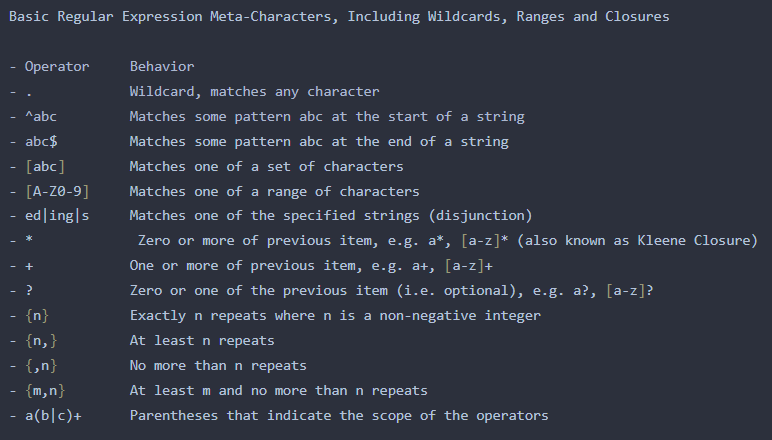

To the Python interpreter, a regular expression is just like any other string. If the string contains a backslash followed by 
- particular characters, it will interpret these specially. For example \b would be interpreted as the backspace character. In 
- general, when using regular expressions containing backslash, we should instruct the interpreter not to look inside the string at 
- all, but simply to pass it directly to the re library for processing. We do this by prefixing the string with the letter r, to 
- indicate that it is a raw string. For example, the raw string r'\band\b' contains two \b symbols that are interpreted by the 
- re library as matching word boundaries instead of backspace characters. If you get into the habit of using r'...' for regular 
- expressions — as we will do from now on — you will avoid having to think about these complications.

## 3.5 Useful Applications of Regular Expressions
The above examples all involved searching for words w that match some regular expression regexp using re.search(regexp, w). Apart 
from checking if a regular expression matches a word, we can use regular expressions to extract material from words, or to modify 
words in specific ways.

### Extracting Word Pieces

The re.findall() ("find all") method finds all (non-overlapping) matches of the given regular expression. Let's find all the 
vowels in a word, then count them:

In [17]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'[aeiou]', word)

['u',
 'e',
 'a',
 'i',
 'a',
 'i',
 'i',
 'i',
 'e',
 'i',
 'a',
 'i',
 'o',
 'i',
 'o',
 'u']

In [18]:
len(re.findall(r'[aeiou]', word))

16

## Finding Word Stems

When we use a web search engine, we usually don't mind (or even notice) if the words in the document differ from our search terms 
in having different endings. A query for laptops finds documents containing laptop and vice versa. Indeed, laptop and laptops are 
just two forms of the same dictionary word (or lemma). For some language processing tasks we want to ignore word endings, and just 
deal with word stems.

There are various ways we can pull out the stem of a word. Here's a simple-minded approach which just strips off anything that 
looks like a suffix:

In [4]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        return word

- Take in a word
- define a list suffix with 9 common suffixes
- Setup a loop to go through each suffix
- if the word ends with the suffix, return the word with that suffix removed

Although we will ultimately use NLTK's built-in stemmers, it's interesting to see how we can use regular expressions for this 
task. Our first step is to build up a disjunction of all the suffixes. We need to enclose it in parentheses in order to limit 
the scope of the disjunction.




-> re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')




Here, we say that we should match the string in 'processing' where we have 0 or more characters
followed by one of 9 possible suffixes
Here, we see that it is 'ing'

Here, re.findall() just gave us the suffix even though the regular expression matched the entire word. This is because the 
parentheses have a second function, to select substrings to be extracted. If we want to use the parentheses to specify the 
scope of the disjunction, but not to select the material to be output, we have to add ?:, which is just one of many arcane 
subtleties of regular expressions. Here's the revised version.

In [19]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [20]:
# However, we'd actually like to split the word into stem and suffix. So we should just parenthesize both parts of the regular 
# expression:

re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

In [21]:
# This looks promising, but still has a problem. Let's look at a different word, processes:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('processe', 's')]

In [22]:
# The regular expression incorrectly found an -s suffix instead of an -es suffix. This demonstrates another subtlety: the star 
# operator is "greedy" and the .* part of the expression tries to consume as much of the input as possible. If we use the 
# "non-greedy" version of the star operator, written *?, we get what we want:

re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processes')

[('process', 'es')]

In [23]:
# This works even when we allow an empty suffix, by making the content of the second parentheses optional:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'language')

[('language', '')]

In [25]:
# This approach still has many problems (can you spot them?) but we will move on to define a function to perform stemming, and 
# apply it to a whole text:
from nltk.tokenize import word_tokenize

def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tokens = word_tokenize(raw)

[stem(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'ly',
 'in',
 'pond',
 'distribut',
 'sword',
 'i',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'Supreme',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

Notice that our regular expression removed the s from ponds but also from is and basis. It produced some non-words like distribut 
and deriv, but these are acceptable stems in some applications.

In [26]:
# Searching Tokenized Text

# You can use a special kind of regular expression for searching across multiple words in a text (where a text is a list of tokens). 
# For example, "<a> <man>" finds all instances of a man in the text. The angle brackets are used to mark token boundaries, and any 
# whitespace between the angle brackets is ignored (behaviors that are unique to NLTK's findall() method for texts). In the following 
# example, we include <.*> [1] which will match any single token, and enclose it in parentheses so only the matched word 
# (e.g. monied) and not the matched phrase (e.g. a monied man) is produced. The second example finds three-word phrases ending with 
# the word bro [2]. The last example finds sequences of three or more words starting with the letter l [3].

from nltk.corpus import gutenberg, nps_chat
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")
moby.findall(r"(<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave
artificial; any; that; a; monied; nervous; a; old; decent; This; a;
this; No; the; dangerous; a; white; a; white; this; the; a; a; any;
one; the; that; That; every; a; a; old; worsted; the; faithful;
Miserable; the; the; the; honest; the; is; a; a; a; fellow; fellow;
fellow; no; white; that; first; a; the; the; elderly; !; young; young;
Young; young; the; a; that; a; a; pious; our; young; young; young;
impenitent; ,; young; young; queer; like; good; good; good; young;
old; young; young; a; young; young; Young; Young; the; a; crazy; the;
a; good; a; the; of; a; that; a; mature; that; earnest; the;
steadfast; no; fearless; a; a; a; mighty; but; ruined; -; unfearing;
white; -; Cape; a; sepulchral; other; sleeping; less; old; old; old;
old; old; old; old; little; lit

In [28]:
# It is easy to build search patterns when the linguistic phenomenon we're studying is tied to particular words. In some cases, 
# a little creativity will go a long way. For instance, searching a large text corpus for expressions of the form x and other ys 
# allows us to discover hypernyms (cf 5):

from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


# 3.6 Normalizing Text
In earlier program examples we have often converted text to lowercase before doing anything with its words, 
e.g. set(w.lower() for w in text). By using lower(), we have normalized the text to lowercase so that the distinction between 
The and the is ignored. Often we want to go further than this, and strip off any affixes, a task known as stemming. A further step 
is to make sure that the resulting form is a known word in a dictionary, a task known as lemmatization. We discuss each of these in 
turn. First, we need to define the data we will use in this section:

In [29]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
tokens

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

## Stemmers

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these in preference to 
crafting your own using regular expressions, since these handle a wide range of irregular cases. The Porter and Lancaster 
stemmers follow their own rules for stripping affixes. Observe that the Porter stemmer correctly handles the word lying 
(mapping it to lie), while the Lancaster stemmer does not.

In [30]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
[porter.stem(t) for t in tokens]

['denni',
 ':',
 'listen',
 ',',
 'strang',
 'women',
 'lie',
 'in',
 'pond',
 'distribut',
 'sword',
 'is',
 'no',
 'basi',
 'for',
 'a',
 'system',
 'of',
 'govern',
 '.',
 'suprem',
 'execut',
 'power',
 'deriv',
 'from',
 'a',
 'mandat',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcic',
 'aquat',
 'ceremoni',
 '.']

In [32]:
# This is just an example which demonstrate that stemming is not a well-defined process
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                 for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = int(width/4)                # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '{:>{width}}'.format(lcontext[-width:], width=width)
            rdisplay = '{:{width}}'.format(rcontext[:width], width=width)
            print(ldisplay, rdisplay)

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [33]:
# Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. The 
# Porter Stemmer is a good choice if you are indexing some texts and want to support search using alternative forms of words 
# (illustrated in 3.6, which uses object oriented programming techniques that are outside the scope of this book, string formatting 
# techniques to be covered in 3.9, and the enumerate() function to be explained in 4.2).

porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)
text.concordance('lie')

r king ! DENNIS : Listen , strange women lying in ponds distributing swords is no
 beat a very brave retreat . ROBIN : All lies ! MINSTREL : [ singing ] Bravest of
       Nay . Nay . Come . Come . You may lie here . Oh , but you are wounded !   
doctors immediately ! No , no , please ! Lie down . [ clap clap ] PIGLET : Well  
ere is much danger , for beyond the cave lies the Gorge of Eternal Peril , which 
   you . Oh ... TIM : To the north there lies a cave -- the cave of Caerbannog --
h it and lived ! Bones of full fifty men lie strewn about its lair . So , brave k
not stop our fight ' til each one of you lies dead , and the Holy Grail returns t


## Lemmatization

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes 
the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.

In [35]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'woman',
 'lying',
 'in',
 'pond',
 'distributing',
 'sword',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'mass',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas 
(or lexicon headwords).

Note:

Another normalization task involves identifying non-standard words including numbers, abbreviations, and dates, and mapping any 
such tokens to a special vocabulary. For example, every decimal number could be mapped to a single token 0.0, and every acronym 
could be mapped to AAA. This keeps the vocabulary small and improves the accuracy of many language modeling tasks.

# 3.7 Regular Expressions for Tokenizing Text
Tokenization is the task of cutting a string into identifiable linguistic units that constitute a piece of language data. Although 
it is a fundamental task, we have been able to delay it until now because many corpora are already tokenized, and because NLTK 
includes some tokenizers. Now that you are familiar with regular expressions, you can learn how to use them to tokenize text, and to have much more control over the process.

Simple Approaches to Tokenization

The very simplest method for tokenizing text is to split on whitespace. Consider the following text from Alice's Adventures in 
Wonderland:

In [36]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
well without--Maybe it's always pepper that makes people hot-tempered,'..."""
# We could split this raw text on whitespace using raw.split(). To do the same using a regular expression, it is not enough to match 
# any space characters in the string [1] since this results in tokens that contain a \n newline character; instead we need to match 
# any number of spaces, tabs, or newlines [2]:

re.split(r' ', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone\nthough),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very\nwell',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [37]:
re.split(r'[ \t\n]+', raw)

["'When",
 "I'M",
 'a',
 "Duchess,'",
 'she',
 'said',
 'to',
 'herself,',
 '(not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though),',
 "'I",
 "won't",
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL.',
 'Soup',
 'does',
 'very',
 'well',
 'without--Maybe',
 "it's",
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 "hot-tempered,'..."]

In [38]:
# The regular expression «[ \t\n]+» matches one or more space, tab (\t) or newline (\n). Other whitespace characters, such as 
# carriage-return and form-feed should really be included too. Instead, we will use a built-in re abbreviation, \s, which means any 
# whitespace character. The above statement can be rewritten as re.split(r'\s+', raw).

# Note

# Important: Remember to prefix regular expressions with the letter r (meaning "raw"), which instructs the Python interpreter to 
# treat the string literally, rather than processing any backslashed characters it contains.

# Splitting on whitespace gives us tokens like '(not' and 'herself,'. An alternative is to use the fact that Python provides us with 
# a character class \w for word characters, equivalent to [a-zA-Z0-9_]. It also defines the complement of this class \W, i.e. all 
# characters other than letters, digits or underscore. We can use \W in a simple regular expression to split the input on anything 
# other than a word character:

re.split(r'\W+', raw)
# Split raw text on anything other than word characters

['',
 'When',
 'I',
 'M',
 'a',
 'Duchess',
 'she',
 'said',
 'to',
 'herself',
 'not',
 'in',
 'a',
 'very',
 'hopeful',
 'tone',
 'though',
 'I',
 'won',
 't',
 'have',
 'any',
 'pepper',
 'in',
 'my',
 'kitchen',
 'AT',
 'ALL',
 'Soup',
 'does',
 'very',
 'well',
 'without',
 'Maybe',
 'it',
 's',
 'always',
 'pepper',
 'that',
 'makes',
 'people',
 'hot',
 'tempered',
 '']

# Important table

The above expression also included «[-.(]+» which causes the double hyphen, ellipsis, and open parenthesis to be tokenized 
separately.

3.4 lists the regular expression character class symbols we have seen in this section, in addition to some other useful symbols.

### Table 3.4:

### Regular Expression Symbols

Symbol Function
- \b  -   Word boundary (zero width)
- \d  -   Any decimal digit (equivalent to [0-9])
- \D  -   Any non-digit character (equivalent to [^0-9])
- \s  -   Any whitespace character (equivalent to [ \t\n\r\f\v])
- \S  -   Any non-whitespace character (equivalent to [^ \t\n\r\f\v])
- \w  -   Any alphanumeric character (equivalent to [a-zA-Z0-9_])
- \W  -   Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_])
- \t  -   The tab character
- \n  -   The newline character

In [42]:
#NLTK's Regular Expression Tokenizer

# The function nltk.regexp_tokenize() is similar to re.findall() (as we've been using it for tokenization). However, 
# nltk.regexp_tokenize() is more efficient for this task, and avoids the need for special treatment of parentheses. For readability 
# we break up the regular expression over several lines and add a comment about each line. The special (?x) "verbose flag" tells 
# Python to strip out the embedded whitespace and comments.

text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)     # set flag to allow verbose regexps
     ([A-Z]\.)+        # abbreviations, e.g. U.S.A.
   | \w+(-\w+)*        # words with optional internal hyphens
   | \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
   | \.\.\.            # ellipsis
   | [][.,;"'?():-_`]  # these are separate tokens; includes ], [
'''
nltk.regexp_tokenize(text, pattern)
['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

# 3.8 Segmentation
This section discusses more advanced concepts, which you may prefer to skip on the first time through this chapter.

Tokenization is an instance of a more general problem of segmentation. In this section we will look at two other instances of this 
problem, which use radically different techniques to the ones we have seen so far in this chapter.

Sentence Segmentation

Manipulating texts at the level of individual words often presupposes the ability to divide a text into individual sentences. As 
we have seen, some corpora already provide access at the sentence level. In the following example, we compute the average number 
of words per sentence in the Brown Corpus:

In [43]:
len(nltk.corpus.brown.words()) / len(nltk.corpus.brown.sents())

20.250994070456922

In [45]:
# In other cases, the text is only available as a stream of characters. Before tokenizing the text into words, we need to segment 
# it into sentences. NLTK facilitates this by including the Punkt sentence segmenter (Kiss & Strunk, 2006). Here is an example 
# of its use in segmenting the text of a novel. (Note that if the segmenter's internal data has been updated by the time you read 
# this, you will see different output):
import pprint
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


In [46]:
# Notice that this example is really a single sentence, reporting the speech of Mr Lucian Gregory. However, the quoted speech 
# contains several sentences, and these have been split into individual strings. This is reasonable behavior for most applications.

# Sentence segmentation is difficult because period is used to mark abbreviations, and some periods simultaneously mark an 
# abbreviation and terminate a sentence, as often happens with acronyms like U.S.A.

# For another approach to sentence segmentation, see 2.

## Summary

- A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.

- Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.

- A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.

- Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.

- Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.

- Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: x.funct(y), e.g., word.isalpha().

- To find out about some variable v, type help(v) in the Python interactive interpreter to read the help entry for this kind of object.

- WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.

- Some functions are not available by default, but must be accessed using Python's import statement.

## Practice

- Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

- ☼ Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

- ☼ Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

- ☼ Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?